<a href="https://colab.research.google.com/github/segnig/Kaggle-Competitions/blob/main/titanic/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [218]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [219]:
FILE_PATH = "/content/drive/MyDrive/Data Science/titanic/"

In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [221]:
train_data = pd.read_csv(FILE_PATH + "train.csv")
test_data = pd.read_csv(FILE_PATH + "test.csv")

In [222]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [223]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [224]:
print("Number Null values for every features")
train_data.isnull().sum()

Number Null values for every features


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [225]:
print("Number Null values for every features")
test_data.isnull().sum()

Number Null values for every features


,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [226]:
for col in train_data.columns:
    print(f"{col}: {train_data[col].nunique()}")

PassengerId: 891
Survived: 2
Pclass: 3
Name: 891
Sex: 2
Age: 88
SibSp: 7
Parch: 7
Ticket: 681
Fare: 248
Cabin: 147
Embarked: 3


# `Sex` vs `Survived`

In [227]:
# % ratio survived
train_data.groupby("Sex")[["Survived"]].mean()

,Survived
Sex,
female,0.742038
male,0.188908


Females exhibited a significantly higher survival rate of `74.2% ` compared to males, whose survival rate was only `18.89%`. This indicates a marked disparity in survival outcomes between genders.

In [228]:
train_data.groupby("Pclass")[["Survived"]].mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


## `pclass`: A proxy for socio-economic status (SES)
## $Survival\ rates\ by\ class:$

* 1st Class: `62.96%`
* 2nd Class: `47.28%`
* 3rd Class: `24.24%`.

The trend shows higher survival odds for upper-class passengers.

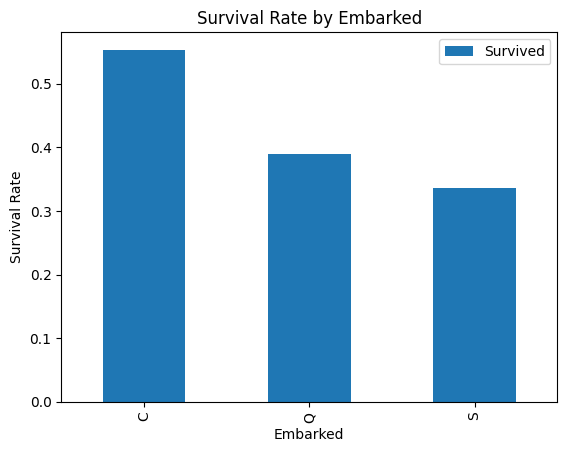

In [229]:
train_data.groupby("Embarked")[["Survived"]].mean().plot(kind="bar")
plt.title("Survival Rate by Embarked")
plt.xlabel("Embarked")
plt.ylabel("Survival Rate")
plt.show()


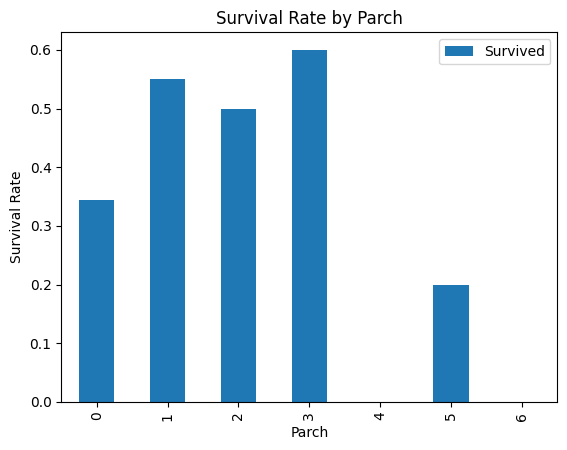

In [230]:
train_data.groupby("Parch")[["Survived"]].mean().plot(kind="bar")
plt.title("Survival Rate by Parch")
plt.xlabel("Parch")
plt.ylabel("Survival Rate")
plt.show()

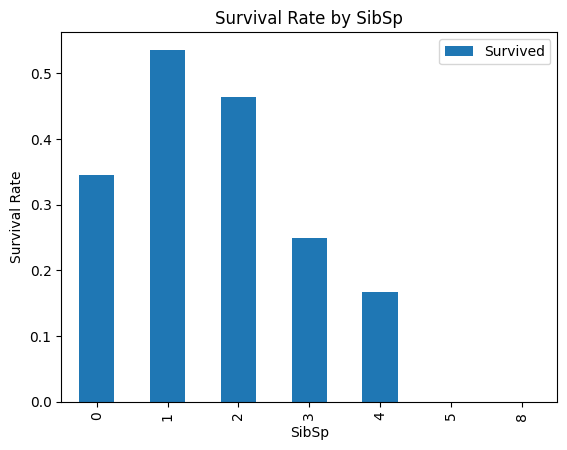

In [231]:
train_data.groupby("SibSp")[["Survived"]].mean().plot(kind="bar")
plt.title("Survival Rate by SibSp")
plt.xlabel("SibSp")
plt.ylabel("Survival Rate")
plt.show()

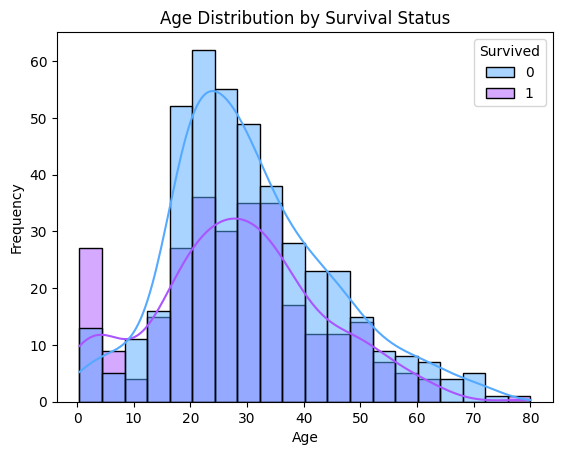

In [232]:
# Plotting the Age distribution
sns.histplot(
    data=train_data,
    x="Age",
    bins=20,
    kde=True,
    hue="Survived",
    palette="cool"
)

# Adding titles and labels
plt.title("Age Distribution by Survival Status")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [233]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [234]:
# missing values
print("Missing count per features of train dataset")
print(train_data.isnull().sum())

print("Missing count per features of a test dataset")
print(test_data.isnull().sum())

Missing count per features of train dataset
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Missing count per features of a test dataset
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [235]:
missed_data_train = train_data.isnull().sum()
missed_data_test = test_data.isnull().sum()

In [236]:
missed_data_train = missed_data_train[missed_data_train > 0]
missed_data_test = missed_data_test[missed_data_test > 0]

In [237]:
print("missed data of train dataset")
print(missed_data_train)

print("missed data of test dataset")
print(missed_data_test)

missed data of train dataset
Age         177
Cabin       687
Embarked      2
dtype: int64
missed data of test dataset
Age       86
Fare       1
Cabin    327
dtype: int64


In [238]:
import warnings

warnings.filterwarnings("ignore")

# Filling missing Age values based on Pclass and Sex
train_data["Age"] = train_data.groupby(["Pclass", "Sex"])["Age"].transform(lambda x: x.fillna(x.mean()))
test_data["Age"] = test_data.groupby(["Pclass", "Sex"])["Age"].transform(lambda x: x.fillna(x.mean()))

# Filling missing Fare values in the test set based on Pclass
test_data["Fare"] = test_data.groupby("Pclass")["Fare"].transform(lambda x: x.fillna(x.mean()))

# Filling missing Embarked values in the test set with the mode of each Pclass
test_data["Embarked"] = test_data.groupby("Pclass")["Embarked"].transform(lambda x: x.fillna(x.mode().iloc[0]))
train_data["Embarked"] = train_data.groupby("Pclass")["Embarked"].transform(lambda x: x.fillna(x.mode().iloc[0]))


In [239]:
missed_data_train = train_data.isnull().sum()
missed_data_test = test_data.isnull().sum()

missed_data_train = missed_data_train[missed_data_train > 0]
missed_data_test = missed_data_test[missed_data_test > 0]

print("missed data of train dataset")
print(missed_data_train)

print("missed data of test dataset")
print(missed_data_test)

missed data of train dataset
Cabin    687
dtype: int64
missed data of test dataset
Cabin    327
dtype: int64


In [240]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


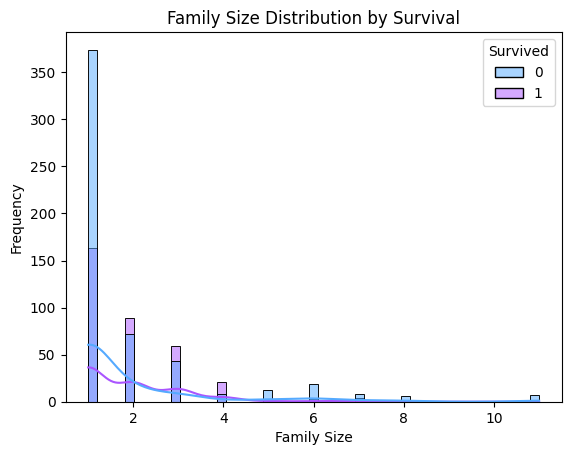

In [241]:
# Create FamilySize feature
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

# Plot the histogram
sns.histplot(
    data=train_data,
    x="FamilySize",
    hue="Survived",
    kde=True,
    palette="cool",
    multiple="layer"
)

# labels and title
plt.title("Family Size Distribution by Survival")
plt.xlabel("Family Size")
plt.ylabel("Frequency")
plt.show()


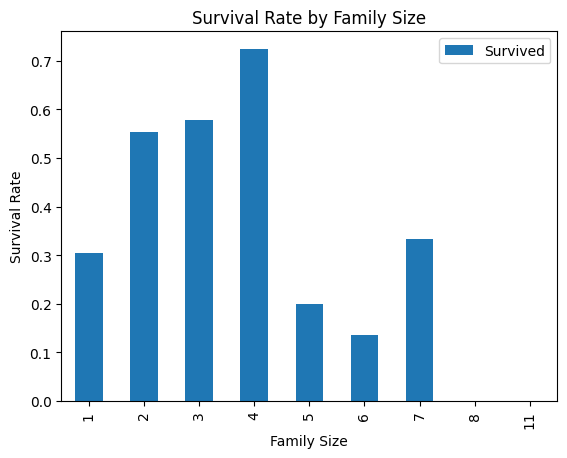

In [242]:
train_data.groupby("FamilySize")[["Survived"]].mean().plot(kind="bar")
plt.title("Survival Rate by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Survival Rate")
plt.show()

In [243]:
train_data["Fare_per_person"] = train_data["Fare"] / train_data["FamilySize"]
test_data["Fare_per_person"] = test_data["Fare"] / test_data["FamilySize"]

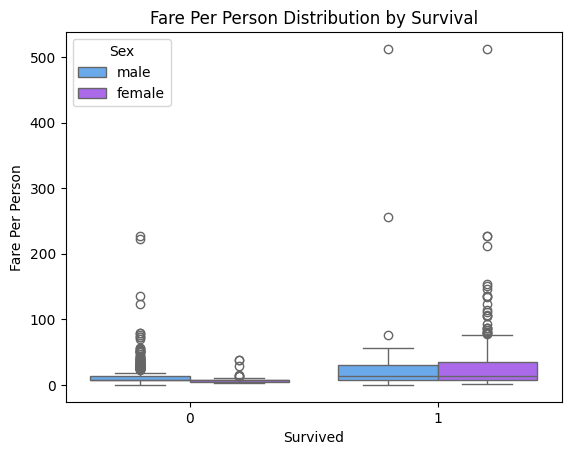

In [244]:
sns.boxplot(
    data=train_data,
    y="Fare_per_person",
    x="Survived",
    hue="Sex",
    palette="cool"
)
plt.title("Fare Per Person Distribution by Survival")
plt.xlabel("Survived")
plt.ylabel("Fare Per Person")
plt.show()

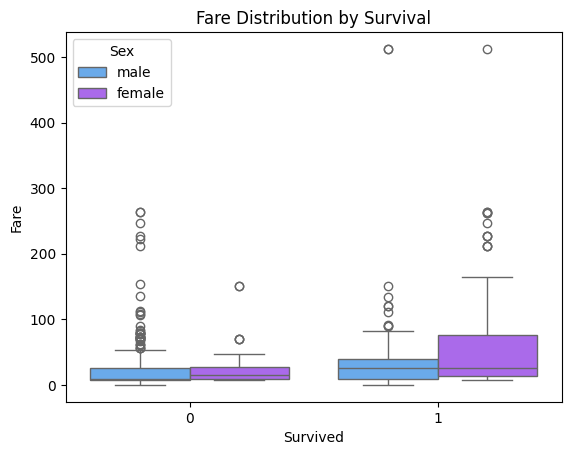

In [245]:
sns.boxplot(
    data=train_data,
    y="Fare",
    x="Survived",
    hue="Sex",
    palette="cool"
)
plt.title("Fare Distribution by Survival")
plt.xlabel("Survived")
plt.ylabel("Fare")
plt.show()

In [247]:
#

train_data["IsCabin"] = train_data["Cabin"].notna().astype(int)
test_data["IsCabin"] = test_data["Cabin"].notna().astype(int)

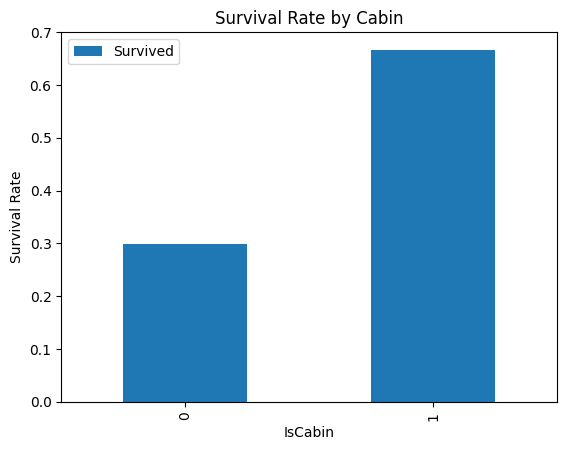

In [248]:
train_data.groupby("IsCabin")[["Survived"]].mean().plot(kind="bar")
plt.title("Survival Rate by Cabin")
plt.xlabel("IsCabin")
plt.ylabel("Survival Rate")
plt.show()

In [251]:
survival_rates = train_data.groupby('Pclass')['Survived'].mean()
print(survival_rates)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [252]:
print("Rate pclass Survived")
train_data["RatePclassSurvived"] = train_data["Pclass"].map(survival_rates)
test_data["RatePclassSurvived"] = test_data["Pclass"].map(survival_rates)

Rate pclass Survived


In [254]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Fare_per_person,IsCabin,RatePclassSurvived
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,3.62500,0,0.242363
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,35.64165,1,0.629630
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,7.92500,0,0.242363
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,26.55000,1,0.629630
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,8.05000,0,0.242363


In [255]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         891 non-null    int64  
 1   Survived            891 non-null    int64  
 2   Pclass              891 non-null    int64  
 3   Name                891 non-null    object 
 4   Sex                 891 non-null    object 
 5   Age                 891 non-null    float64
 6   SibSp               891 non-null    int64  
 7   Parch               891 non-null    int64  
 8   Ticket              891 non-null    object 
 9   Fare                891 non-null    float64
 10  Cabin               204 non-null    object 
 11  Embarked            891 non-null    object 
 12  FamilySize          891 non-null    int64  
 13  Fare_per_person     891 non-null    float64
 14  IsCabin             891 non-null    int64  
 15  RatePclassSurvived  891 non-null    float64
dtypes: float

In [256]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         418 non-null    int64  
 1   Pclass              418 non-null    int64  
 2   Name                418 non-null    object 
 3   Sex                 418 non-null    object 
 4   Age                 418 non-null    float64
 5   SibSp               418 non-null    int64  
 6   Parch               418 non-null    int64  
 7   Ticket              418 non-null    object 
 8   Fare                418 non-null    float64
 9   Cabin               91 non-null     object 
 10  Embarked            418 non-null    object 
 11  FamilySize          418 non-null    int64  
 12  Fare_per_person     418 non-null    float64
 13  IsCabin             418 non-null    int64  
 14  RatePclassSurvived  418 non-null    float64
dtypes: float64(4), int64(6), object(5)
memory usage: 49.1+ KB

In [257]:
dropped_features = ["Cabin", "Name", "Ticket", "PassengerId", "Fare"]

test = test_data.copy()
train_data.drop(dropped_features, axis=1, inplace=True)
test_data.drop(dropped_features, axis=1, inplace=True)

In [259]:
train_data_copy = train_data.copy()
test_data_copy = test_data.copy()

In [260]:
train_data_copy = pd.get_dummies(train_data_copy, columns=["Sex", "Embarked"])
test_data_copy = pd.get_dummies(test_data_copy, columns=["Sex", "Embarked"])

In [261]:
X, y = train_data_copy.drop("Survived", axis=1), train_data_copy["Survived"]

In [267]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [263]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pclass              891 non-null    int64  
 1   Age                 891 non-null    float64
 2   SibSp               891 non-null    int64  
 3   Parch               891 non-null    int64  
 4   FamilySize          891 non-null    int64  
 5   Fare_per_person     891 non-null    float64
 6   IsCabin             891 non-null    int64  
 7   RatePclassSurvived  891 non-null    float64
 8   Sex_female          891 non-null    bool   
 9   Sex_male            891 non-null    bool   
 10  Embarked_C          891 non-null    bool   
 11  Embarked_Q          891 non-null    bool   
 12  Embarked_S          891 non-null    bool   
dtypes: bool(5), float64(3), int64(5)
memory usage: 60.2 KB


In [264]:
test_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Pclass              418 non-null    int64  
 1   Age                 418 non-null    float64
 2   SibSp               418 non-null    int64  
 3   Parch               418 non-null    int64  
 4   FamilySize          418 non-null    int64  
 5   Fare_per_person     418 non-null    float64
 6   IsCabin             418 non-null    int64  
 7   RatePclassSurvived  418 non-null    float64
 8   Sex_female          418 non-null    bool   
 9   Sex_male            418 non-null    bool   
 10  Embarked_C          418 non-null    bool   
 11  Embarked_Q          418 non-null    bool   
 12  Embarked_S          418 non-null    bool   
dtypes: bool(5), float64(3), int64(5)
memory usage: 28.3 KB


In [265]:
X.describe()

,Pclass,Age,SibSp,Parch,FamilySize,Fare_per_person,IsCabin,RatePclassSurvived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.318643,0.523008,0.381594,1.904602,19.916375,0.228956,0.383838
std,0.836071,13.281103,1.102743,0.806057,1.613459,35.841257,0.420397,0.165353
min,1.000000,0.420000,0.000000,0.000000,1.000000,0.000000,0.000000,0.242363
25%,2.000000,21.750000,0.000000,0.000000,1.000000,7.250000,0.000000,0.242363
50%,3.000000,26.507589,0.000000,0.000000,1.000000,8.300000,0.000000,0.242363
75%,3.000000,36.000000,1.000000,0.000000,2.000000,23.666667,0.000000,0.472826
max,3.000000,80.000000,8.000000,6.000000,11.000000,512.329200,1.000000,0.629630


In [268]:
min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
test_data_scaled = min_max_scaler.transform(test_data_copy)

In [272]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [273]:
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

LogisticRegression()

In [274]:
y_scaled_pred = lg_model.predict(X_test)

In [275]:
accuracy_score(y_test, y_scaled_pred)

0.8156424581005587

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

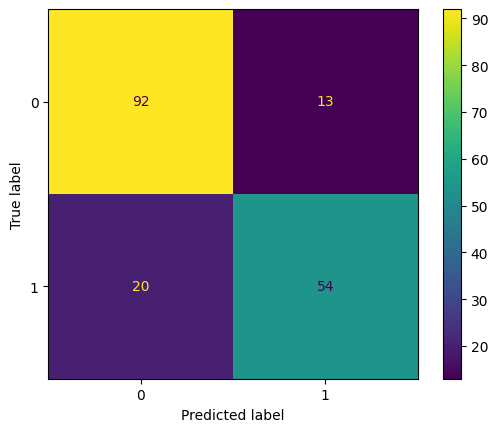

In [276]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_scaled_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lg_model.classes_)
disp.plot()
plt

In [277]:
# feature importances
feature_importances = pd.Series(lg_model.coef_[0], index=X.columns)

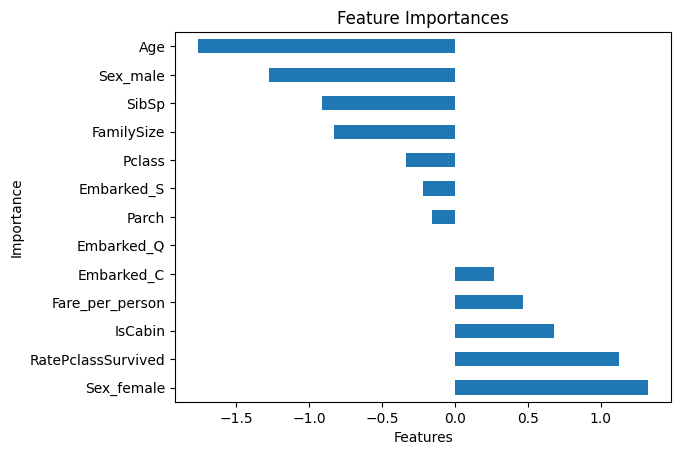

In [281]:
feature_importances.sort_values(ascending=False).plot(kind="barh")
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [284]:
lg_model.coef_[0]

array([-3.32984788e-01, -1.76406416e+00, -9.12345638e-01, -1.59718607e-01,
       -8.25707674e-01,  4.66766912e-01,  6.76350006e-01,  1.12746225e+00,
        1.32717604e+00, -1.27620407e+00,  2.71521846e-01, -9.46165141e-04,
       -2.19603711e-01])

In [288]:
y_pred_scaled_lg_model = lg_model.predict(test_data_scaled)

from datetime import datetime

current_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

submission_df = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": y_pred_scaled_lg_model})
file_path = FILE_PATH + f"submission_lg_model_scaled_{current_time}.csv"
submission_df.to_csv(file_path, index=False)

print(f"Succesfully Saved on file path `{file_path}`.")

Succesfully Saved on file path `/content/drive/MyDrive/Data Science/titanic/submission_lg_model_scaled_2024-12-13_13-01-06.csv`.


In [289]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_

In [290]:
y_rf_pred = best_rf_model.predict(X_test)

In [291]:
accuracy_score(y_test, y_rf_pred)

0.8324022346368715

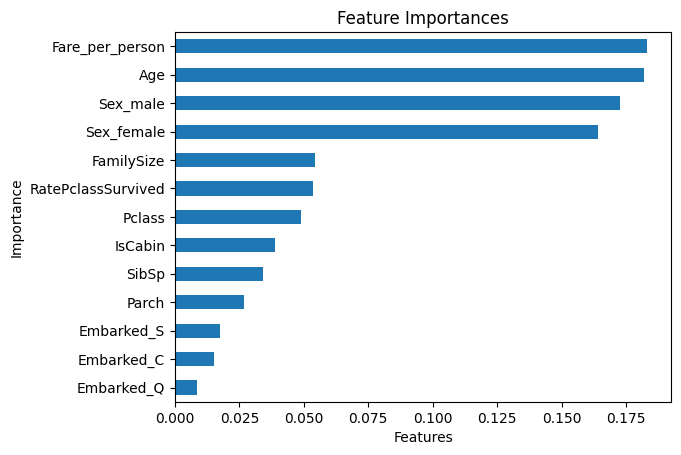

In [293]:
feature_importances_rf = pd.Series(best_rf_model.feature_importances_, index=X.columns)

feature_importances_rf.sort_values(ascending=True).plot(kind="barh")
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

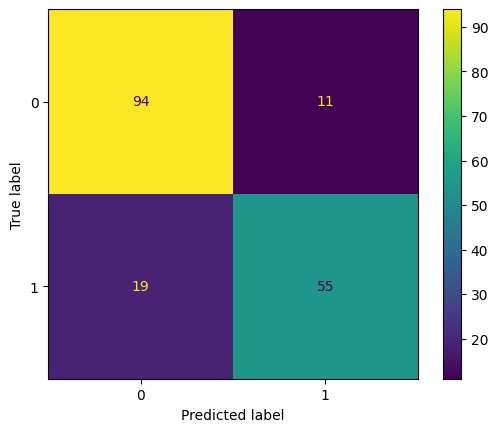

In [295]:
cm = confusion_matrix(y_test, y_rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf_model.classes_)
disp.plot()
plt.show()

In [297]:
y_rf_pred_scalled = best_rf_model.predict(test_data_scaled)
submission_df = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": y_rf_pred_scalled})
file_path = FILE_PATH + f"submission_rf_model_scaled_{current_time}.csv"
submission_df.to_csv(file_path, index=False)

print(f"Succesfully Saved on file path `{file_path}`.")

Succesfully Saved on file path `/content/drive/MyDrive/Data Science/titanic/submission_rf_model_scaled_2024-12-13_13-01-06.csv`.
